In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않는다.
# 현재 Age, Cabin, 그리고 Embarked에 Null 값이 존재하는 것을 볼 수 있다.
# Age는 평균 나이로, Cabin과 Embarked는 "N" 으로 채워준다.

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 개수: ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수:  0


In [4]:
# 문자열 피처를 보자면, Sex, Cabin, Embarked가 있다.

print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포: 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
C70              1
D15              1
B80              1
E58              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [5]:
# Cabin 값을 보면 속성값이 제대로 정리가 되지 않은 것 같이 보인다. 여러 Cabin이 한꺼번에 표기된 Cabin도 더러 보인다.
# Cabin의 경우에는 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다. 따라서 등급만 추출해내도록 한다.

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
# 데이터를 탐색해보자. 먼저 성별에 따른 생존자 수를 비교해보자.

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

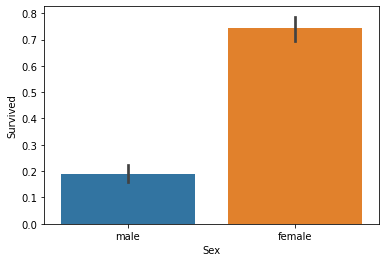

In [7]:
# Seaborn을 사용하여 데이터를 시각화해보자.

sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

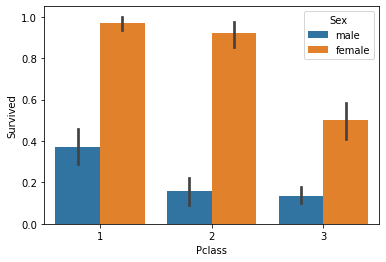

In [8]:
# 부자와 가난한 사람 간의 생존 확률도 따져보자. 객실 등급을 기준으로 생존확률을 살펴본다.

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

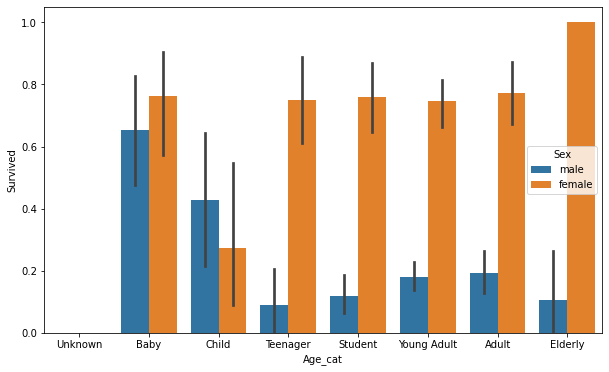

In [10]:
# 이번엔 나이에 따른 생존 확률을 알아보자.

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X 축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# 함수 지정 후 처리
titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [11]:
# 위 분석으로 Sex, Age 그리고 PClass 등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있었다.

# 남아있는 문자열 카테고리 피처를 숫자형 카테고리로 변환한다.

from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3
